## Assignment-7 :
 Download FER 2013 facial emotional data sets.

 FER 2013 is 7 class emotion classification data sets.

 Split I into train and test data sets.

(i)Show the dimension of the LBP feature vector.

(ii)Apply LBP to extract features.

(iii)Apply non-linear SVM for final classification tasks.

(iv)Report the final performance of recognition in terms of “accuracy”.

(v) Draw “ROC” and “AUC”, and “Confusion metrics to validate the model performance”.

 Apply HoG to extract features.

 Show the dimension of the HoG feature vector.

 Apply non-linear SVM for final classification tasks.

Report the final performance of recognition in terms of “accuracy”.

Draw “ROC” and “AUC”, and “Confusion metrics to validate the model performance”.

Apply SIFT to extract features.

Show the dimension of the SIFT feature vector.

Report the final performance of recognition in terms of “accuracy”.

Draw “ROC” and “AUC”, and “Confusion metrics to validate the model performance”.

Apply GLCM to extract features.

Show the dimension of the GLCM feature vector.

Apply non-linear SVM for final classification tasks.

Report the final performance of recognition in terms of “accuracy”.

Draw “ROC” and “AUC”, and “Confusion metrics to validate the model performance”.

Now, concatenate “LBP”, “HoG”, “SIFT”, and “GLCM” features vector into a single flatten feature vector.

Report the final performance of recognition in terms of “accuracy”.

Draw “ROC” and “AUC”, and “Confusion metrics to validate the model performance”.

(vi) Compute probability and weight score level fusion techniques to optimize the performance of recognition of these models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load FER 2013 dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fer2013.csv')

# Split into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract pixels and labels
X_train = train_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32').reshape(48, 48))
y_train = train_data['emotion']
X_test = test_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32').reshape(48, 48))
y_test = test_data['emotion']

In [8]:
import numpy as np
from skimage.feature import local_binary_pattern

def extract_lbp_features(images):
    lbp_features = [local_binary_pattern(image, P=8, R=1, method='uniform') for image in images]
    return np.array([feat.flatten() for feat in lbp_features])

X_train_lbp = extract_lbp_features(X_train)
X_test_lbp = extract_lbp_features(X_test)

print("LBP feature vector dimension:", X_train_lbp.shape[1])

LBP feature vector dimension: 2304


In [9]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = [hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True) for image in images]
    return np.array(hog_features)

X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

print("HoG feature vector dimension:", X_train_hog.shape[1])


HoG feature vector dimension: 900


In [10]:
import cv2

def extract_sift_features(images, vector_size=128):
    sift = cv2.SIFT_create()
    sift_features = []
    for image in images:
        kp, des = sift.detectAndCompute(image.astype('uint8'), None)
        if des is not None:
            # Flatten descriptors
            des = des.flatten()
            # If there are more than vector_size descriptors, truncate them
            if des.shape[0] > vector_size:
                des = des[:vector_size]
            # If there are fewer than vector_size descriptors, pad with zeros
            elif des.shape[0] < vector_size:
                des = np.concatenate([des, np.zeros(vector_size - des.shape[0])])
        else:
            # If no descriptors are found, pad with zeros
            des = np.zeros(vector_size)
        sift_features.append(des)
    return np.array(sift_features)

X_train_sift = extract_sift_features(X_train)
X_test_sift = extract_sift_features(X_test)

print("SIFT feature vector dimension:", X_train_sift.shape[1])


SIFT feature vector dimension: 128


In [11]:
from skimage.feature import graycomatrix, graycoprops
def extract_glcm_features(images):
    glcm_features = []
    for image in images:
        glcm = graycomatrix(image.astype('uint8'), distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        glcm_features.append([contrast, dissimilarity, homogeneity, energy, correlation])
    return np.array(glcm_features)

X_train_glcm = extract_glcm_features(X_train)
X_test_glcm = extract_glcm_features(X_test)

print("GLCM feature vector dimension:", X_train_glcm.shape[1])

GLCM feature vector dimension: 5


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    svm = SVC(kernel='rbf', probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Compute ROC curve and AUC
    y_prob = svm.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, fpr, tpr, roc_auc, cm

# Reduce dataset size for quicker execution
def reduce_dataset(X, y, sample_size=1000):
    indices = np.random.choice(len(X), sample_size, replace=False)
    return X[indices], y.iloc[indices]

sample_size = 1000

# Reduce training and testing datasets
X_train_lbp_sample, y_train_sample = reduce_dataset(X_train_lbp, y_train, sample_size)
X_test_lbp_sample, y_test_sample = reduce_dataset(X_test_lbp, y_test, sample_size)

X_train_hog_sample, _ = reduce_dataset(X_train_hog, y_train, sample_size)
X_test_hog_sample, _ = reduce_dataset(X_test_hog, y_test, sample_size)

X_train_sift_sample, _ = reduce_dataset(X_train_sift, y_train, sample_size)
X_test_sift_sample, _ = reduce_dataset(X_test_sift, y_test, sample_size)

X_train_glcm_sample, _ = reduce_dataset(X_train_glcm, y_train, sample_size)
X_test_glcm_sample, _ = reduce_dataset(X_test_glcm, y_test, sample_size)

# Train and evaluate SVM on the reduced dataset
accuracy_lbp, fpr_lbp, tpr_lbp, roc_auc_lbp, cm_lbp = train_and_evaluate_svm(X_train_lbp_sample, y_train_sample, X_test_lbp_sample, y_test_sample)
print("LBP Accuracy:", accuracy_lbp)

accuracy_hog, fpr_hog, tpr_hog, roc_auc_hog, cm_hog = train_and_evaluate_svm(X_train_hog_sample, y_train_sample, X_test_hog_sample, y_test_sample)
print("HoG Accuracy:", accuracy_hog)

accuracy_sift, fpr_sift, tpr_sift, roc_auc_sift, cm_sift = train_and_evaluate_svm(X_train_sift_sample, y_train_sample, X_test_sift_sample, y_test_sample)
print("SIFT Accuracy:", accuracy_sift)

accuracy_glcm, fpr_glcm, tpr_glcm, roc_auc_glcm, cm_glcm = train_and_evaluate_svm(X_train_glcm_sample, y_train_sample, X_test_glcm_sample, y_test_sample)
print("GLCM Accuracy:", accuracy_glcm)


LBP Accuracy: 0.233
HoG Accuracy: 0.221
SIFT Accuracy: 0.224
GLCM Accuracy: 0.223


In [13]:
from sklearn.preprocessing import StandardScaler

# Concatenate features
X_train_combined_sample = np.hstack((X_train_lbp_sample, X_train_hog_sample, X_train_sift_sample, X_train_glcm_sample))
X_test_combined_sample = np.hstack((X_test_lbp_sample, X_test_hog_sample, X_test_sift_sample, X_test_glcm_sample))

# Standardize features
scaler = StandardScaler()
X_train_combined_sample = scaler.fit_transform(X_train_combined_sample)
X_test_combined_sample = scaler.transform(X_test_combined_sample)

accuracy_combined, fpr_combined, tpr_combined, roc_auc_combined, cm_combined = train_and_evaluate_svm(X_train_combined_sample, y_train_sample, X_test_combined_sample, y_test_sample)
print("Combined Features Accuracy:", accuracy_combined)

Combined Features Accuracy: 0.227


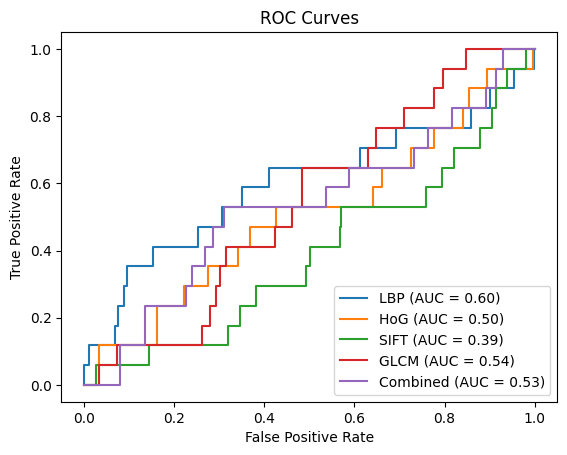

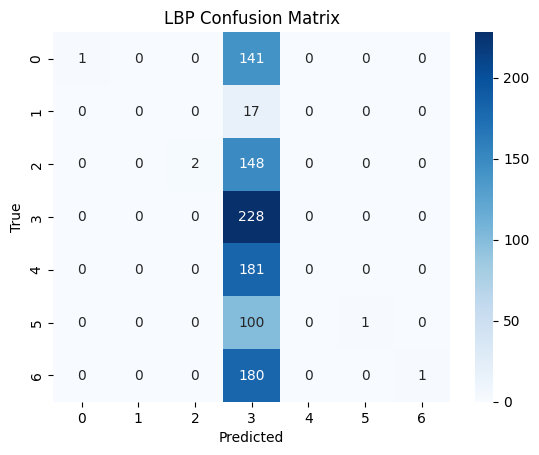

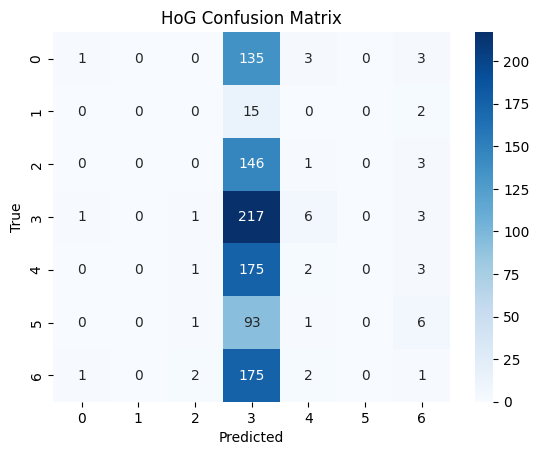

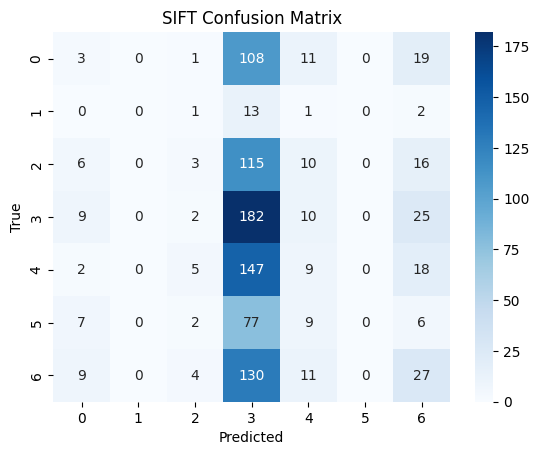

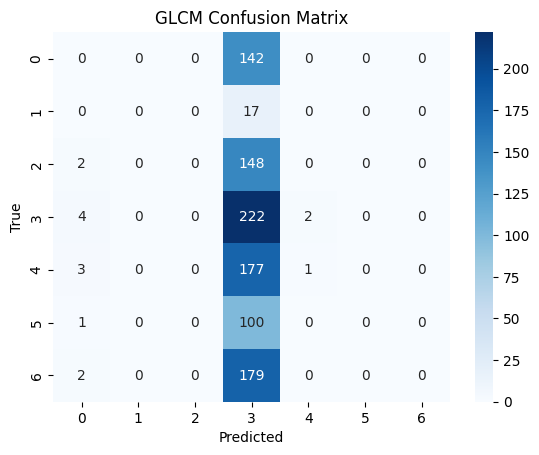

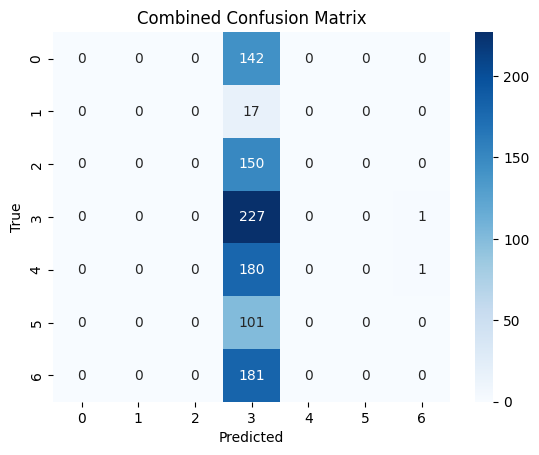

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ROC curves
plt.figure()
plt.plot(fpr_lbp, tpr_lbp, label=f'LBP (AUC = {roc_auc_lbp:.2f})')
plt.plot(fpr_hog, tpr_hog, label=f'HoG (AUC = {roc_auc_hog:.2f})')
plt.plot(fpr_sift, tpr_sift, label=f'SIFT (AUC = {roc_auc_sift:.2f})')
plt.plot(fpr_glcm, tpr_glcm, label=f'GLCM (AUC = {roc_auc_glcm:.2f})')
plt.plot(fpr_combined, tpr_combined, label=f'Combined (AUC = {roc_auc_combined:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(cm_lbp, 'LBP Confusion Matrix')
plot_confusion_matrix(cm_hog, 'HoG Confusion Matrix')
plot_confusion_matrix(cm_sift, 'SIFT Confusion Matrix')
plot_confusion_matrix(cm_glcm, 'GLCM Confusion Matrix')
plot_confusion_matrix(cm_combined, 'Combined Confusion Matrix')


Average Fusion Accuracy: 0.228
Weighted Fusion Accuracy: 0.228


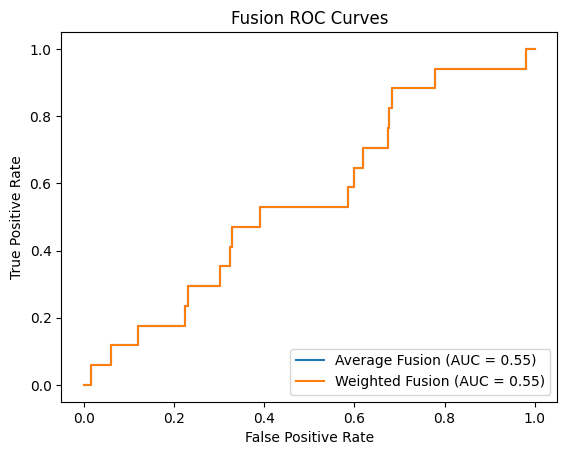

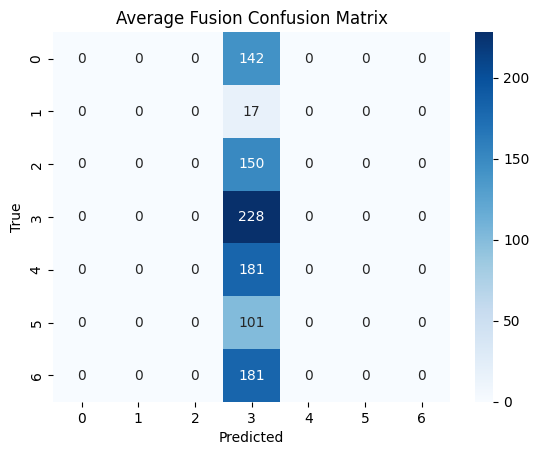

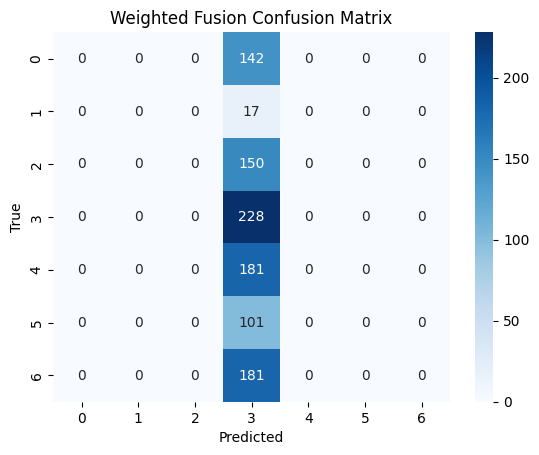

In [16]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix   #Added

# Compute probability level fusion
svm_lbp = SVC(kernel='rbf', probability=True)
svm_lbp.fit(X_train_lbp_sample, y_train_sample)
probs_lbp = svm_lbp.predict_proba(X_test_lbp_sample)

svm_hog = SVC(kernel='rbf', probability=True)
svm_hog.fit(X_train_hog_sample, y_train_sample)
probs_hog = svm_hog.predict_proba(X_test_hog_sample)

svm_sift = SVC(kernel='rbf', probability=True)
svm_sift.fit(X_train_sift_sample, y_train_sample)
probs_sift = svm_sift.predict_proba(X_test_sift_sample)

svm_glcm = SVC(kernel='rbf', probability=True)
svm_glcm.fit(X_train_glcm_sample, y_train_sample)
probs_glcm = svm_glcm.predict_proba(X_test_glcm_sample)

# Averaging the probabilities
probs_avg = (probs_lbp + probs_hog + probs_sift + probs_glcm) / 4

# Weighted averaging the probabilities (example weights)
weights = [0.25, 0.25, 0.25, 0.25]
probs_weighted = (weights[0] * probs_lbp + weights[1] * probs_hog + weights[2] * probs_sift + weights[3] * probs_glcm)

def evaluate_fusion(probs, y_true):      #Added
    y_pred = np.argmax(probs, axis=1)
    accuracy = accuracy_score(y_true, y_pred)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, probs[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, fpr, tpr, roc_auc, cm

# Evaluate performance
accuracy_avg, fpr_avg, tpr_avg, roc_auc_avg, cm_avg = evaluate_fusion(probs_avg, y_test_sample)
accuracy_weighted, fpr_weighted, tpr_weighted, roc_auc_weighted, cm_weighted = evaluate_fusion(probs_weighted, y_test_sample)

print("Average Fusion Accuracy:", accuracy_avg)
print("Weighted Fusion Accuracy:", accuracy_weighted)

# Plot ROC curves for fusion techniques
plt.figure()
plt.plot(fpr_avg, tpr_avg, label=f'Average Fusion (AUC = {roc_auc_avg:.2f})')
plt.plot(fpr_weighted, tpr_weighted, label=f'Weighted Fusion (AUC = {roc_auc_weighted:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fusion ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices for fusion techniques
plot_confusion_matrix(cm_avg, 'Average Fusion Confusion Matrix')
plot_confusion_matrix(cm_weighted, 'Weighted Fusion Confusion Matrix')
